In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Decision Trees Hyperparameters:**

- max_depth = max depth of the tree
- max_leaf_nodes = max number of leaves on tree 
- min_samples_split = minimum number of samples required to split a node  
    - 20 samples, [17,3]. The tree would split the node into two [17,0] and [0,3]
    - min_samples_split=25, the 20 samples becomes a leaf 
        - **Don't want nodes with few samples**
- min_samples_leaf = minimum number of samples required to be a leaf node 
    - 100 samples, [98,2] splits to two nodes [98,0] and [0,2]
    - min_samples_leaf=3 says a leaf node must have at least 3 samples so the above isn't split

## Toy Example

In [2]:
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/good_or_evil_train'
train_set = pd.read_csv(path)
train_set

,name,sex,mask,cape,tie,ears,smokes,class
0,batman,0,1,1,0,1,0,good
1,robin,0,1,1,0,0,0,good
2,alfred,0,0,0,1,0,0,good
3,penguin,0,0,0,1,0,1,bad
4,catwoman,1,1,0,0,1,0,bad
5,joker,0,0,0,0,0,0,bad


**Goal**: Identify people as good or bad based on appearance (classification problem)

In [3]:
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/good_or_evil_test'
test_set = pd.read_csv(path)
test_set

,name,sex,mask,cape,tie,ears,smokes
0,batgirl,1,1,1,0,1,0
1,riddler,0,1,0,0,0,0


In [4]:
# feature matrix x/target vector y 
X_train = train_set.drop(['name','class'],axis=1)
y_train = train_set['class']
X_test = test_set.drop('name',axis=1)

In [5]:
# train a classification tree 
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
# feature names 
X_train.columns

Index(['sex', 'mask', 'cape', 'tie', 'ears', 'smokes'], dtype='object')

In [7]:
# class names 
tree_clf.classes_

array(['bad', 'good'], dtype=object)

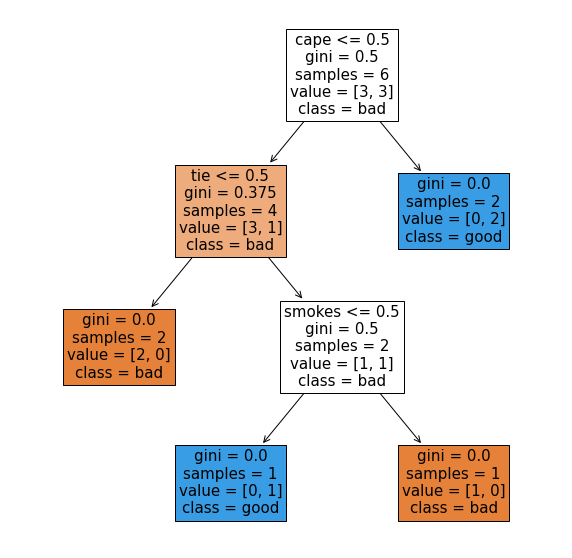

In [8]:
# plot classification trees
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(tree_clf,
          feature_names = X_train.columns,
          class_names = tree_clf.classes_,
          filled = True,
          fontsize = 15)
plt.show()

- **is cape = 0?** True on left  
    - cape = 0 False: 2 samples, both good
        - *leaf node: classes as good* 
    - cape = 0 True: 4 samples, 3 bad, 1 good 
        - **is tie = 0?** True on left 
            - tie = 0 True: 2 samples, both bad  
                - *leaf node: classes as bad*
            - tie = 0 False: 2 samples, 1 good, 1 bad
                - **is smokes = 0?** True on left 
                    - smokes = 0 True: 1, good
                        - *leaf node: classes as good*
                    - smokes = 0 False: 1, bad 
                        - *leaf node: classes as bad*

In [9]:
tree_clf.predict(X_test)

array(['good', 'bad'], dtype=object)

**If left unconstrained, a classification tree will overfit the data**

## Fix Overfitting

In [10]:
# load Pima Indians Diabetes dataset
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/pima.csv'
diabetes = pd.read_csv(path)
diabetes

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
X = diabetes.drop('label',axis=1)
y = diabetes.label

In [12]:
# train-test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [13]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
tree_clf.classes_

array([0, 1], dtype=int64)

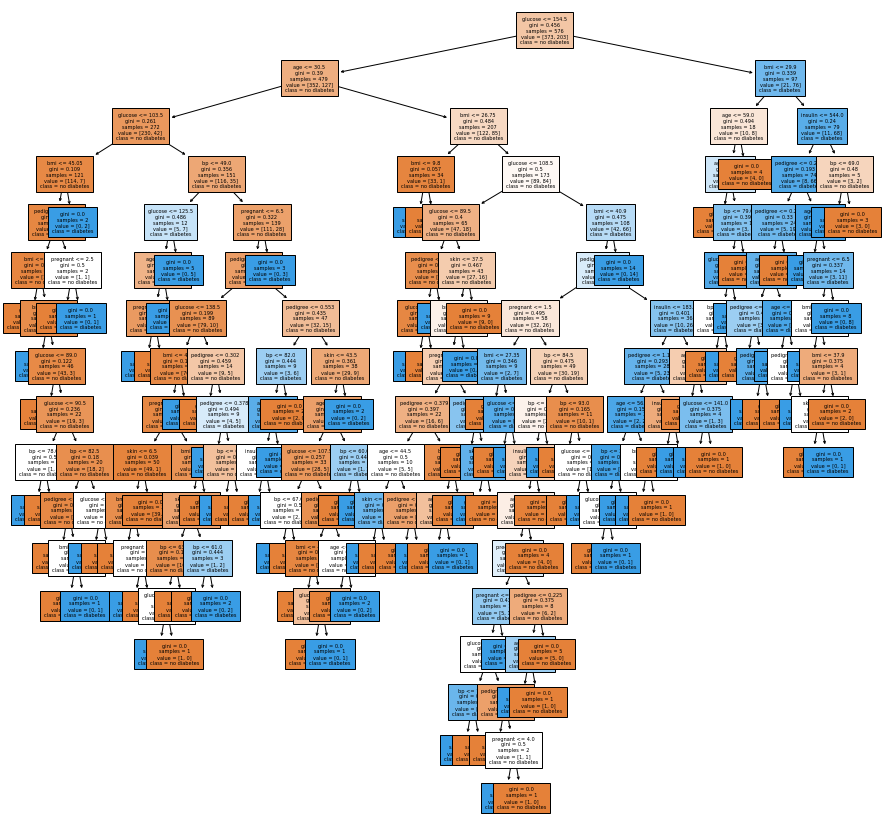

In [15]:
# fit and plot the classification tree
plt.figure(figsize = (15,15))
plot_tree(tree_clf,
          feature_names = X_train.columns,
          class_names = ['no diabetes','diabetes'],
          filled = True,
          fontsize = 5)
plt.show()

In [32]:
# grid search 
from sklearn.model_selection import GridSearchCV
param_dic = {'max_depth' : [2,3,4,5,6,7,8,9,10],
            'max_leaf_nodes' : [None,2,4,8], # none=unlimited
            'min_samples_split' : [2,4,8,16,32], # default is 2
            'min_samples_leaf' : [1,2,4,8,16,32] # default is 1
            }
grid = GridSearchCV(tree_clf, param_dic, cv=5, n_jobs=-1,scoring = 'accuracy', verbose=True)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_leaf_nodes=5),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [None, 2, 4, 8],
                         'min_samples_leaf': [1, 2, 4, 8, 16, 32],
                         'min_samples_split': [2, 4, 8, 16, 32]},
             scoring='accuracy', verbose=True)

In [34]:
grid.best_params_

{'max_depth': 4,
 'max_leaf_nodes': None,
 'min_samples_leaf': 32,
 'min_samples_split': 2}

In [35]:
best_clf = grid.best_estimator_

In [16]:
# are we overfitting? 
from sklearn.metrics import accuracy_score 

In [36]:
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [37]:
accuracy_score(y_train,y_train_pred)
# for the tree_clf is 1

0.7847222222222222

In [38]:
accuracy_score(y_test,y_test_pred)
# for the tree_clf is 0.698

0.7916666666666666

In [20]:
# big gap between accuracy scores for train and test set means overfitting

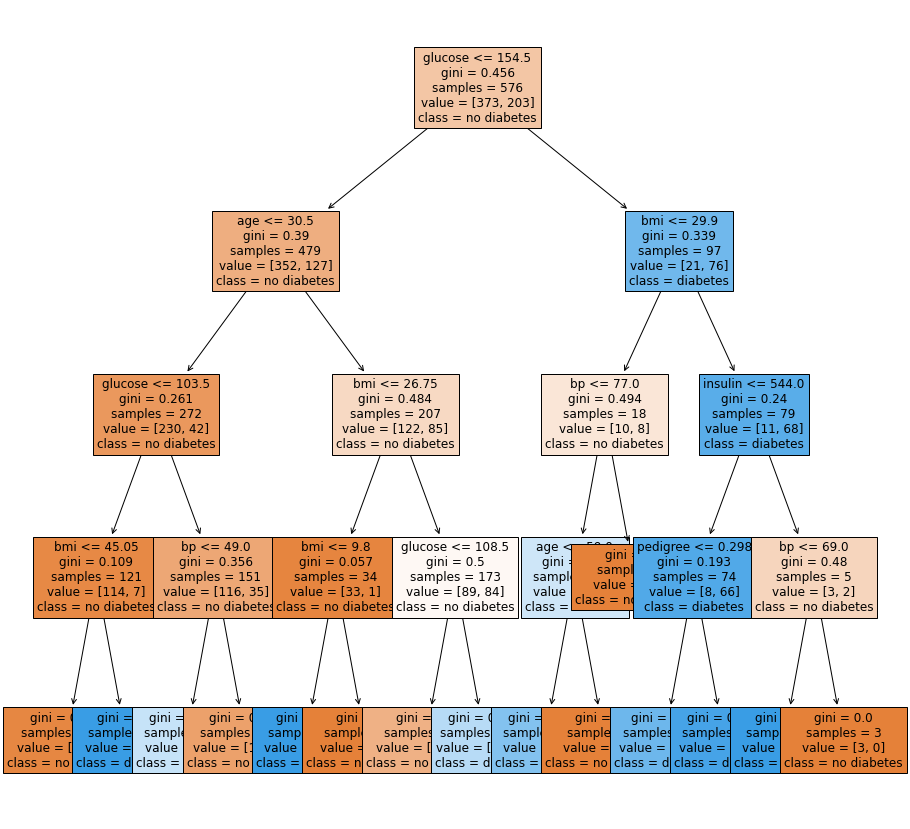

In [21]:
# fix overfitting 
tree_clf = DecisionTreeClassifier(max_depth=4)
# depth is how many questions you can ask in the train (1 extra row, row 0)
tree_clf.fit(X_train,y_train)
plt.figure(figsize = (15,15))
plot_tree(tree_clf,
          feature_names = X_train.columns,
          class_names = ['no diabetes','diabetes'],
          filled = True,
          fontsize = 12)
plt.show()

In [22]:
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

In [23]:
accuracy_score(y_train,y_train_pred)

0.8107638888888888

In [24]:
accuracy_score(y_test,y_test_pred)

0.7604166666666666

In [25]:
# much smaller gap between accuracy scores 
# need to run a grid search to determine best depth 

## The Two Moons Dataset

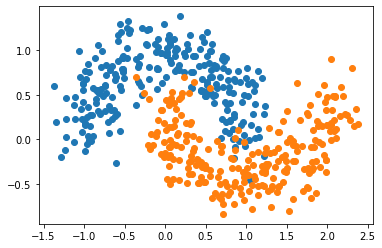

In [26]:
from sklearn.datasets import make_moons 
X,y = make_moons(n_samples=500,noise=0.2)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [27]:
import matplotlib.pyplot as plt
import numpy as np
def draw_classification_regions(X,y,model):
    
    # classes 
    classes = model.classes_
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print('something went wrong')
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # map classes to 0,1,2
    for i in range(n_classes):
        Z[Z==classes[i]]=i

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==classes[i],0], X[y==classes[i],1], c = colors[i], label=classes[i], s=75, alpha=0.8)

    ax.set_xlabel(feature_names[0], fontsize=15)
    ax.set_ylabel(feature_names[1], fontsize=15)

    ax.legend()

In [28]:
tree_clf = DecisionTreeClassifier(max_depth=6)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=6)

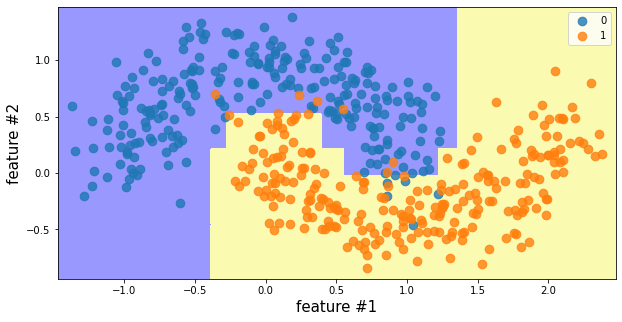

In [29]:
draw_classification_regions(X,y,tree_clf)

**Decision Trees Hyperparameters:**

- max_depth = max depth of the tree
- max_leaf_nodes = max number of leaves on tree 
- min_samples_split = minimum number of samples required to split a node  
    - 20 samples, [17,3]. The tree would split the node into two [17,0] and [0,3]
    - min_samples_split=25, the 20 samples becomes a leaf 
        - **Don't want nodes with few samples**
- min_samples_leaf = minimum number of samples required to be a leaf node 
    - 100 samples, [98,2] splits to two nodes [98,0] and [0,2]
    - min_samples_leaf=3 says a leaf node must have at least 3 samples so the above isn't split

In [ ]:
# 